# Model Preparation Challenge

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings

# import my useful functions library. If you want to learn more about it, follow the link in the next cell
import ds_useful

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

* First, load the dataset.

In [3]:
# Establish postgres access details
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

# Start the engine and connect to the database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Perform a select query
life_df = pd.read_sql_query('SELECT * FROM {}'.format(table_name), con=engine)

# Dispose the engine. We don't need it anymore
engine.dispose()

In [4]:
print(life_df.info())
life_df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


One thing I notice is that the column names are wack, with weird spaces in front or before. I am goint to fix this

In [5]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Get rid of spaces left of column and right of column, then lowercase all characters
life_df.rename(columns=lambda x: x.lstrip().rstrip().lower(), inplace=True)
life_df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 


In [7]:
# LOOK FOR MISSING DATA
ds_useful.missingness_summary(life_df)

population                         22.191967
hepatitis b                        18.822328
gdp                                15.248468
total expenditure                   7.692308
alcohol                             6.603131
income composition of resources     5.684139
schooling                           5.547992
bmi                                 1.157250
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
diphtheria                          0.646698
polio                               0.646698
adult mortality                     0.340368
life expectancy                     0.340368
under-five deaths                   0.000000
hiv/aids                            0.000000
measles                             0.000000
percentage expenditure              0.000000
infant deaths                       0.000000
status                              0.000000
year                                0.000000
country                             0.000000
dtype: flo

There seems to be a lot of missing data. A lot if it may be because it went unreported. I suspect filling the data on a basis of whether or not its a developed country is a good idea, and maybe by the year as well.

Since the dataset is organized by country 

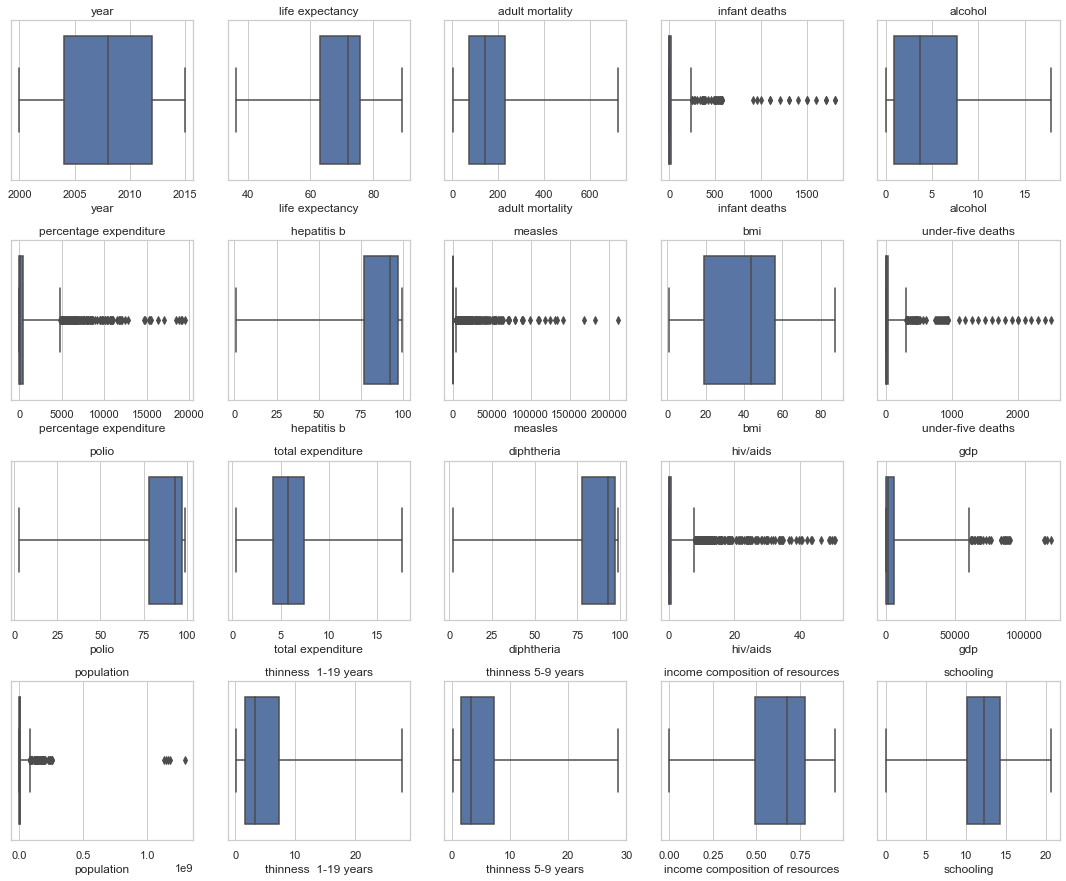

In [8]:
#First, let's look at all the distributions

# Plot all continuous distributions in a subplot.
# ds_useful.auto_subplots(life_df, kind='hist') # I like the boxplots better for this. Uncomment to see histograms
ds_useful.auto_subplots(life_df, kind='boxplot', whis=10)

In [9]:
# Now we'll start to look at some of the missing variables one at a time. First, lets look at population. We'll compare developed and developing contries
print(life_df['status'].value_counts())

Developing    2426
Developed      512
Name: status, dtype: int64


In [10]:
# To fill in the missing values, first we'll interpolate the data grouped by country. That way the data fills linearly with existing data from the same country, which should maintain that country's trends
# Then, we will fill in whatever couldn't be filled by interpolation(the left and right bounds being null), we'll fill with the median of that country. 
filled_df = life_df.copy()
for country in filled_df['country'].unique():
    filled_df.loc[filled_df['country'] == country] = filled_df.loc[filled_df['country'] == country].interpolate(
                                                                    method='linear').fillna(
                                                                    filled_df.loc[filled_df['country'] == country].median())
ds_useful.missingness_summary(filled_df)

population                         22.055820
gdp                                13.784888
income composition of resources     5.684139
schooling                           5.547992
hepatitis b                         4.901293
bmi                                 1.157250
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
total expenditure                   1.089176
alcohol                             0.578625
adult mortality                     0.340368
life expectancy                     0.340368
hiv/aids                            0.000000
diphtheria                          0.000000
polio                               0.000000
under-five deaths                   0.000000
measles                             0.000000
percentage expenditure              0.000000
infant deaths                       0.000000
status                              0.000000
year                                0.000000
country                             0.000000
dtype: flo

In [11]:
# Let's find out why some of these still have nulls. We'll look at population.
filled_df.loc[filled_df['population'].isnull()]['country'].value_counts()

Libya                                                   16
Yemen                                                   16
Qatar                                                   16
Egypt                                                   16
Iran (Islamic Republic of)                              16
Oman                                                    16
Somalia                                                 16
Democratic People's Republic of Korea                   16
Congo                                                   16
Slovakia                                                16
Bahrain                                                 16
United States of America                                16
Barbados                                                16
United Republic of Tanzania                             16
Bahamas                                                 16
Czechia                                                 16
Kyrgyzstan                                              

In [12]:
# The repetitive null values make me think that all rows for each of those countries are NaN. Let's confirm
print(life_df.loc[life_df['country'] == 'Monaco', ['year','population']])
life_df.loc[life_df['country'] == 'Bahrain', ['year','population']]

year  population
1716  2013         NaN


,year,population
177,2015,NaN
178,2014,NaN
179,2013,NaN
180,2012,NaN
181,2011,NaN
182,2010,NaN
183,2009,NaN
184,2008,NaN
185,2007,NaN
186,2006,NaN


In [13]:
# Seems I was right. For those countries, let's fill them with the central occurring values in the same development status
for status in life_df['status'].unique():
    for year in life_df['year'].unique():
        filled_df.loc[life_df['status'] == status] = filled_df.loc[life_df['status'] == status].fillna(
                                                        filled_df.loc[filled_df['status'] == status].loc[filled_df['year'] == year].median())
ds_useful.missingness_summary(filled_df)

schooling                          0.0
income composition of resources    0.0
year                               0.0
status                             0.0
life expectancy                    0.0
adult mortality                    0.0
infant deaths                      0.0
alcohol                            0.0
percentage expenditure             0.0
hepatitis b                        0.0
measles                            0.0
bmi                                0.0
under-five deaths                  0.0
polio                              0.0
total expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
country                            0.0
dtype: float64

In [14]:
# Now we have a dataset with no missing data. Let's investigate the outliers
life_df = filled_df
ds_useful.outliers_summary(life_df, 5)

measles                            12.865895
hiv/aids                           10.142954
population                          7.862491
percentage expenditure              7.726344
gdp                                 6.909462
under-five deaths                   4.152485
infant deaths                       4.016338
life expectancy                     0.000000
adult mortality                     0.000000
alcohol                             0.000000
hepatitis b                         0.000000
schooling                           0.000000
bmi                                 0.000000
income composition of resources     0.000000
polio                               0.000000
total expenditure                   0.000000
diphtheria                          0.000000
thinness  1-19 years                0.000000
thinness 5-9 years                  0.000000
year                                0.000000
dtype: float64

In [15]:
# Let's check out measels to see wtf is up with all these outliers
# First we'll look at measles, and find out what makes up the outlier ones

life_df.loc[life_df['measles'].isin(ds_useful.get_outliers(life_df['measles'], 5)), 'country'].value_counts()

China                                 16
India                                 16
Indonesia                             16
Democratic Republic of the Congo      15
Nigeria                               14
                                      ..
Venezuela (Bolivarian Republic of)     1
Sierra Leone                           1
Armenia                                1
Malawi                                 1
Guinea-Bissau                          1
Name: country, Length: 83, dtype: int64

In [16]:
life_df.loc[life_df['infant deaths'].isin(ds_useful.get_outliers(life_df['infant deaths'], 75))]['country'].value_counts()

India    4
Name: country, dtype: int64

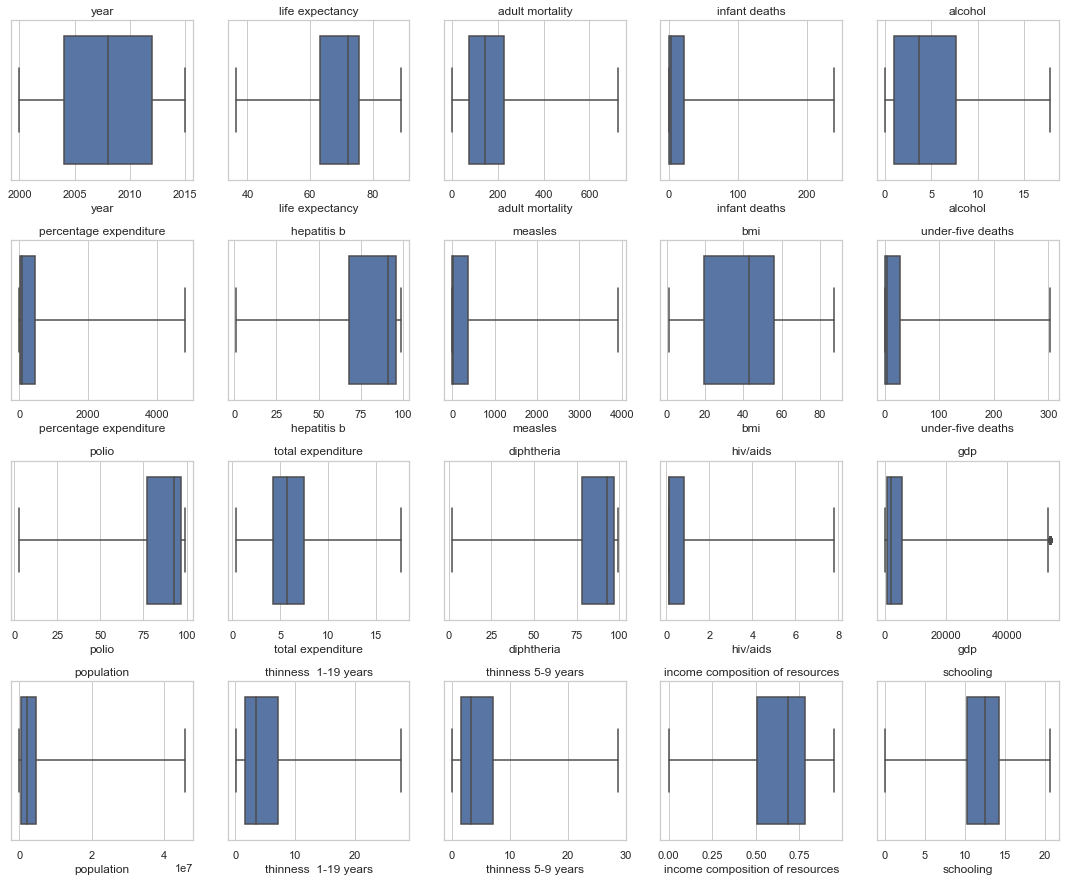

In [17]:
# Grab the outliers summary from the database
outliers = ds_useful.outliers_summary(life_df, 10)

# Iterate through columns that have outliers
for column in outliers.loc[outliers > 0].index:
    percentiles = ds_useful.get_percentiles(life_df, column, 10)
    life_df[column] = stats.mstats.winsorize(life_df[column], percentiles)

ds_useful.auto_subplots(life_df, kind='boxplot', whis=10)

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

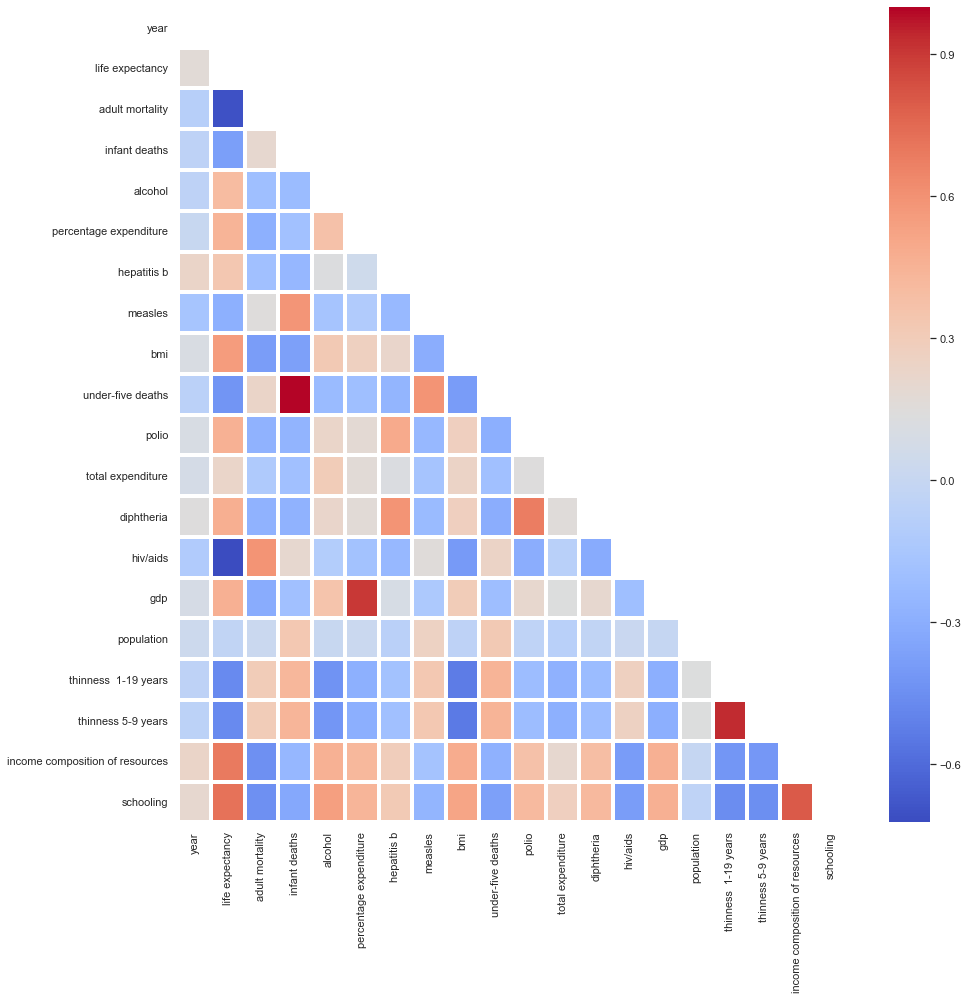

In [18]:
# Multivariate Analysis of all features on all numeric features and label
plt.figure(figsize=[15, 15])
corr = life_df.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot=False, linewidths=3, cmap='coolwarm')
plt.show()

In [19]:
# We notice that the variables income composition of resources, and schooling are highly correlated with each other, and almost identiacally correlated with the rest of the data.
# We can safely drop one of these and not lose much variability from our dataset.

# The same thing goes between thinness and thinness, diphtheria and polio, infant deaths and under 5 deaths, gdp and percentage expenditure. 

# Let's decide between a few of those by which is more highly correlated with the target variable

In [20]:
# First We'll get the similar variables

feature_corr = corr.drop('life expectancy', axis=1).drop('life expectancy', axis=0)
target_corr = corr.loc['life expectancy']

similar_pairs = []
for col in feature_corr.columns:
    for index in feature_corr.index:
        if np.abs(feature_corr.loc[index, col]) > .7 and index != col and [col, index] not in similar_pairs:
            similar_pairs.append([index, col])

# Then we'll find the variable in each similar pair that is less correlated (which we'll drop later)
drop_variables = []
for pair in similar_pairs:
    if target_corr[pair[0]] < target_corr[pair[0]]:
        drop_variables.append(pair[0])
    else:
        drop_variables.append(pair[1])

print('These are variables we will drop first when we enter feature engineering')
drop_variables

These are variables we will drop first when we enter feature engineering


['infant deaths',
 'percentage expenditure',
 'thinness  1-19 years',
 'income composition of resources']

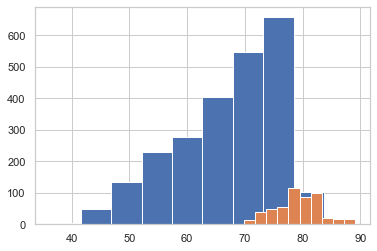

It appears that the distributions are rather similar between the two. Let's perform a t-test to see if they describe a significantly different distribution from each other
Ttest_indResult(statistic=-29.769627237638797, pvalue=2.0398587189841335e-170)
With a low p-value, we can difinitively reject the null that there is no difference between life expectancy in developing vs developed countries


In [21]:
# Now let's perform some univariate analysis on our categorical data and see how they affect life expectancy

plt.hist(life_df.loc[life_df['status'] == 'Developing']['life expectancy'])
plt.hist(life_df.loc[life_df['status'] == 'Developed']['life expectancy'])
plt.show()

print('It appears that the distributions are rather similar between the two. Let\'s perform a t-test to see if they describe a significantly different distribution from each other')

tstats = stats.ttest_ind(life_df.loc[life_df['status'] == 'Developing']['life expectancy'], life_df.loc[life_df['status'] == 'Developed']['life expectancy'])
print(tstats)
print('With a low p-value, we can difinitively reject the null that there is no difference between life expectancy in developing vs developed countries')

F_onewayResult(statistic=177.97395998352505, pvalue=0.0)
The low p-value allows us to reject the null that there is no differences between the countries. Next perform a tukeys HSD test


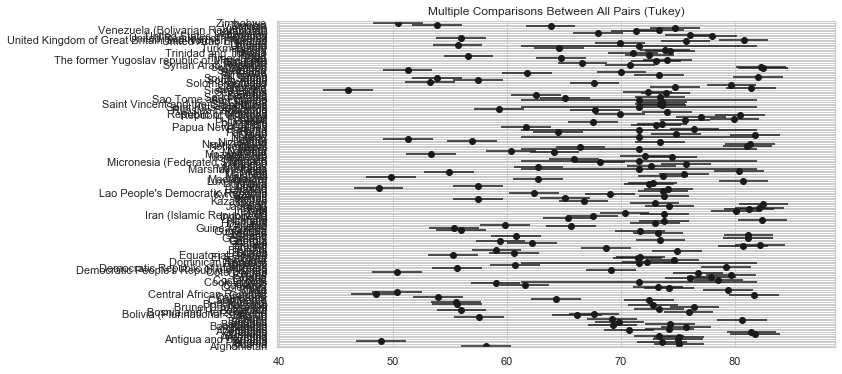

In [22]:
# Create a series for the life expectancy at each country
anova_array = [life_df.loc[life_df['country'] == country]['life expectancy'] for country in life_df['country'].unique()]

# Perform an ANOVA test
print(stats.f_oneway(*anova_array))

print('The low p-value allows us to reject the null that there is no differences between the countries. Next perform a tukeys HSD test')

#Perform Tukey's Honest Significant Differences Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=life_df['life expectancy'], groups=life_df['country'])

# Turn the summary into a dataframe so we can investigate it
tukey.plot_simultaneous()
plt.show()

In [23]:
# While the above graph isn't pretty, it certainly illustrates how different the distributions are by country. They are hardly similar at all.

# This means we ought to leave them all in the dataset, as they are a large contributor to variance in our target variable.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


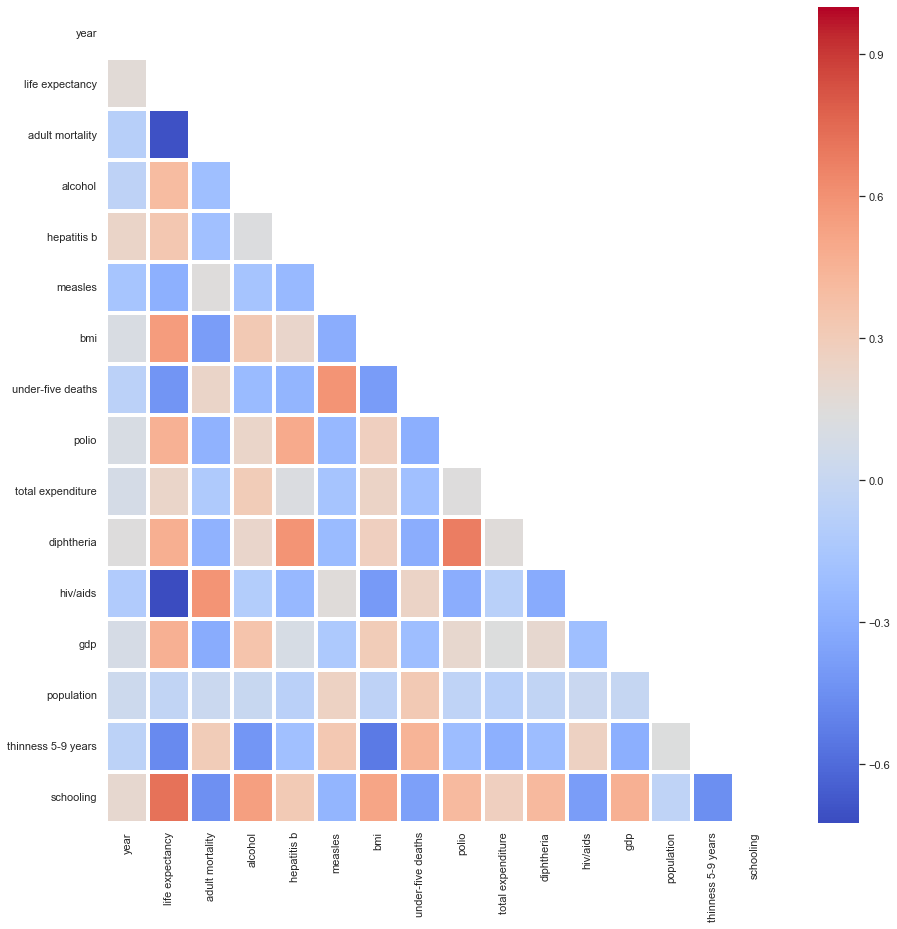

In [24]:
# Now we can drop those variables from the similar pairs
drop_df = life_df.drop(columns=drop_variables)

# Look at the heatmap to see how no variables are obviously correlated with other variables anymore
plt.figure(figsize=[15, 15])
corr = drop_df.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot=False, linewidths=3, cmap='coolwarm')
plt.show()

# We should be able to see that there are no longer any obviously important correlatoins (except within life expectancy)

In [25]:
# Since all the categorical variables seemed to play a big role, we will leave those in there.

# Our final dataset looks like this!
drop_df.head()

,country,year,status,life expectancy,adult mortality,alcohol,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 5-9 years,schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5


* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

Our dataset, after cleaning and feature engineering, has a number of categorical and continuous data that explain something about our target variable, 'life expectancy'.

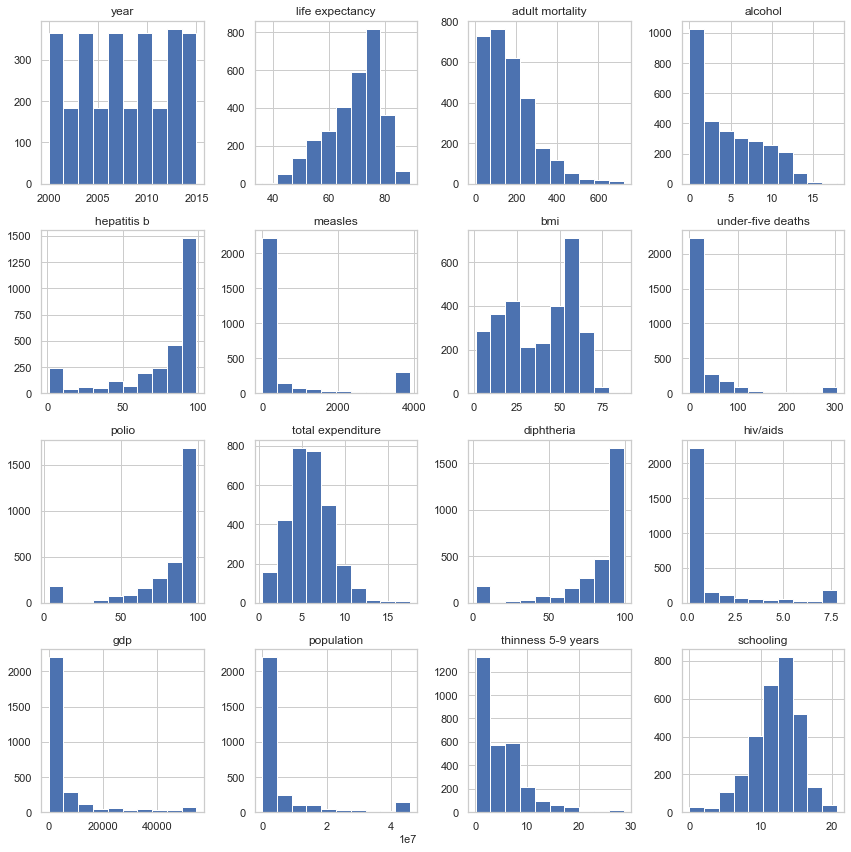

In [26]:
# Here are the distributions of continuous data
ds_useful.auto_subplots(drop_df)

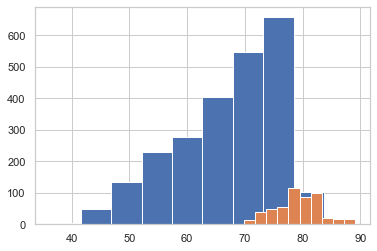

In [27]:
# Here we can see our target variable segregated by developing / developed status
plt.hist(life_df.loc[life_df['status'] == 'Developing']['life expectancy'])
plt.hist(life_df.loc[life_df['status'] == 'Developed']['life expectancy'])
plt.show()

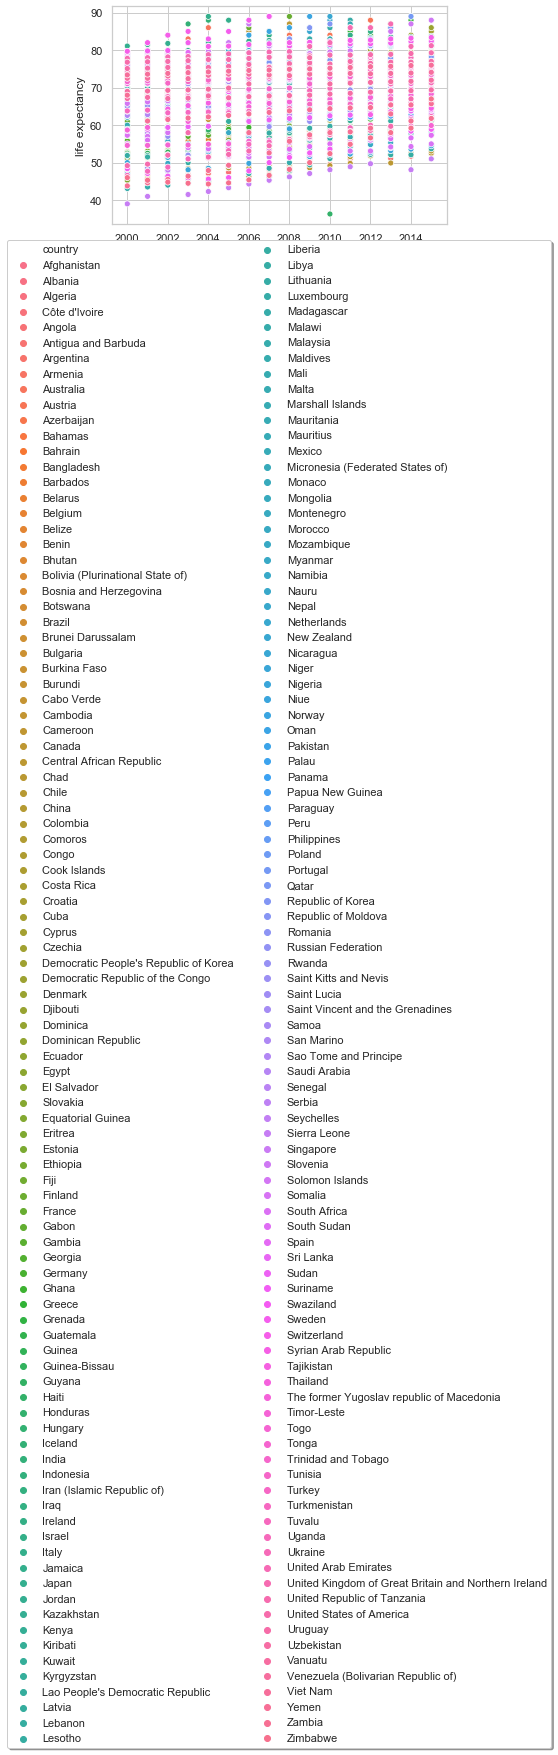

In [28]:
# And finally here is our target variable, colored by country, which is just to show how variable it can be
ax=plt.subplot(111)
sns.scatterplot(x='year', y='life expectancy', data=drop_df, hue='country', ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

## Summary
### Data Cleaning:
I filled null variables by interpolating within each country, so as not to create data in a country using data from another country.
However, some countries only had null data for some variables. Those I filled with the median data in the same year and same developing/developed status.

For outliers, I played around with different thresholds/whis until I settled on using 10. I chose 10 because I wanted to retain variability in the dataset. I winsorized the outliers at those thresholds, capping it to a certain value, but maintaining those observation's high relative magnitude.

### Feature Selection:
To select Features, I used a correlation heatmap to visually see how each continuous feature affected the target variable. I realized that in many instances, two features represented very similar distributions. In order to fight dimensionality, I found all similar pairs with at least 70% correlation to each other, and eliminated the ones less correlated with the target variable. That way I still have variables representing that variability, but not more than I need. 

As far as categorical variables go, I ensured that both country and status have a significant effect on the feature variable. I decided to keep both.

### Future Steps:
In order to finish model preparation, I would next run PCA to limit my continuous features even more, then prepare the categorical columns in a manner depending on the intended model. Since I don't know what that is, I will leave that step out for now.